In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Задание №1

Обучите любую модель классификации на датасете IRIS до применения PCA и после него. Сравните качество классификации по отложенной выборке.

In [2]:
# Загрузим игрушечный датасет из sklearn
iris = load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [3]:
# Для начала отмасштабируем выборку
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.std()

1.0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
random_forest = RandomForestClassifier(max_depth=1, random_state=1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, random_state=1)

In [6]:
acc = random_forest.score(X_test, y_test)

Реализуем функцию метода главных компонент

In [7]:
def pca(X, n_components):
    # Найдем собственные векторы и собственные значения
    covariance_matrix = X.T @ X
    eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

    # сформируем список кортежей (собственное значение, собственный вектор)
    eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

    # и отсортируем список по убыванию собственных значений
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    
    # Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
    W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(n_components)])
    
    # Сформируем новую матрицу "объекты-признаки"
    Z = X.dot(W)
    
    return Z

In [8]:
X_reduced = pca(X_scaled, 2)
X_reduced

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

In [11]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [12]:
random_forest.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=1, random_state=1)

In [13]:
acc1 = random_forest.score(X_test_reduced, y_test)

In [14]:
print(f'Accuracy без PCA: {acc}')
print(f'Accuracy c PCA: {acc1}')

Accuracy без PCA: 0.9777777777777777
Accuracy c PCA: 0.7555555555555555


# Задание №2

Напишите свою реализацию метода главных компонент посредством сингулярного разложения с использованием функции numpy.linalg.svd().

In [15]:
def pca(X, n_components):
    # Центрирование данных
    X = X - np.mean(X, axis=0)
    
    # Вычисление матрицы ковариации данных
    cov_matrix = np.cov(X.T)
    
    # Вычисление сингулярного разложения матрицы ковариации данных
    U, S, V = np.linalg.svd(cov_matrix)
    
    # Сортировка сингулярных значений в порядке убывания и соответствующих им сингулярных векторов
    idx = np.argsort(-S)
    U = U[:, idx]
    S = S[idx]
    
    # Выбор наиболее значимых сингулярных векторов
    U_reduced = U[:, :n_components]
    
    # Умножение матрицы данных на выбранные сингулярные векторы
    X_reduced = np.dot(X, U_reduced)
    
    return X_reduced

In [18]:
X_reduced = pca(X_scaled, 2)

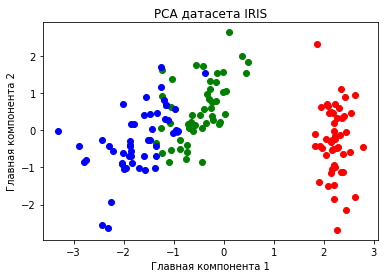

In [19]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X_reduced[y==i, 0], X_reduced[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()